In [1]:
 # M U L T I P O L O

In [2]:
# Import delle librerie Necessarie

from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [3]:
# Definizioni di Variabili

Nbins = 200

test = int(input("Inserire test: "))     # test = 1, 2, 3

l = int(input("Inserire il multipolo l: "))         # l = 0, 2, 4

Nmeasures = int(input("Inserire il numero di misure da considerare: "))

Inserire test: 1
Inserire il multipolo l: 0
Inserire il numero di misure da considerare: 100


In [4]:
# Definizioni dei Parametri per la Matrice di Covarianza Teorica

if test == 1:
    
    
    sigma = [0.00, 0.02, 0.00, 0.02, 0.00, 0.02]
    
    h = [0, 25, 0, 50, 0, 75]
    
elif test == 2:
    
    
    sigma = [0.00, 0.02, 0.00, 0.01, 0.00, 0.005]
    
    h = [0, 50, 0, 50, 0, 50]
    
    
else:
    sigma = [0.00, 0.02, 0.00, 0.01, 0.00, 0.005]
    
    h = [0, 5, 0, 5, 0, 5]

In [5]:
# Definizione della Funzione per la Matrice di Covarianza Teorica

def cov_function_th(x1, x2, sig, L):
    return sig ** 2. * np.exp( - (x1 - x2) ** 2. / (2. * L ** 2.))

In [6]:
# Lettura dei File 

begin = time.time()

measures = []
pos = []

for i in np.arange(Nmeasures) + 1:
    
    fname = f'/home/stefano/Progetto_Ati/dati_progetto/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file = fits.open(fname)
    table = file[1].data.copy()
    
    for j in range(Nbins):
        measures.append([table[j][l + 1]])
        
    if i == 1:
        
        for k in range(Nbins):
            pos.append(table[k][0])
            
    del table
    file.close()
    
measures = np.asarray(measures).reshape(Nmeasures, Nbins).transpose()
pos = np.asarray(pos)

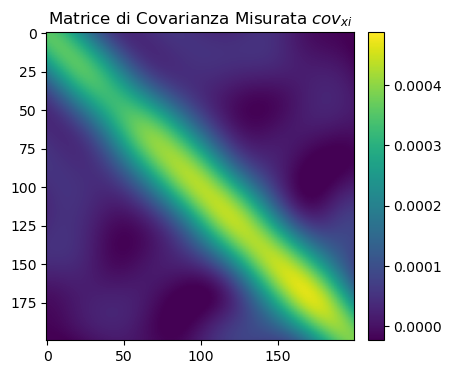

In [7]:
# Matrix plot della Matrice di Covarianza Misurata
    
cov_xi = np.cov(measures)

cmin = - np.max(cov_xi) * 0.05 
cmax =  np.max(cov_xi) * 1.05 

fig = plt.figure(figsize = (6, 4))
plt.title('Matrice di Covarianza Misurata $cov_{xi}$')
colormap = plt.cm.get_cmap('viridis')
plt.imshow(cov_xi, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [8]:
# Covarianza numerica 

Ave = np.zeros((Nbins,), dtype = float)
Cov = np.zeros((Nbins, Nbins), dtype = float)

for i in range(Nmeasures):
    Ave = Ave + measures[: ,i]
Ave /= Nmeasures

for i in range(Nbins):
    for j in range(Nbins):
        
        Cov[i, j] = (np.sum((measures[i] - Ave[i]) * (measures[j] - Ave[j]))) / (Nmeasures - 1.)
        
delta_cov = Cov - cov_xi

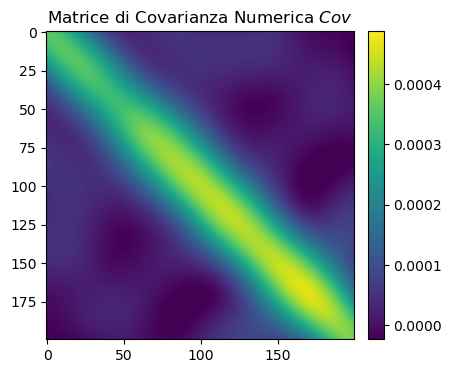

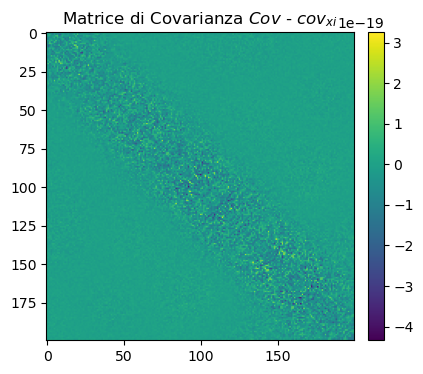

In [9]:
# Matrix plot della Matrice di Covarianza Numerica

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')    
plt.title('Matrice di Covarianza Numerica $Cov$')
plt.imshow(Cov, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

# Matrix plot della Matrice della Differenza Cov - cov_xi

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza $Cov$ - $cov_{xi}$')
plt.imshow(delta_cov, colormap)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [10]:
# Covarianza Teorica

cov_th = np.zeros((Nbins, Nbins), dtype = float)

for i in range(Nbins):
    
    for j in range(Nbins):
        
        cov_th[i, j] = cov_function_th(pos[i], pos[j], sigma[l + 1], h[l + 1])

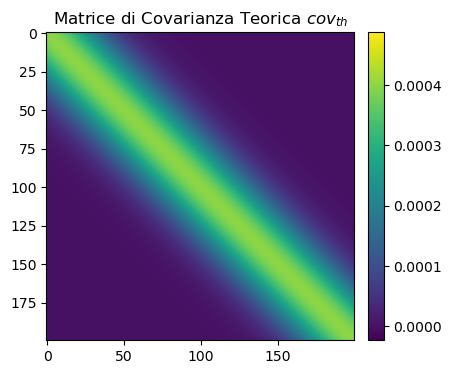

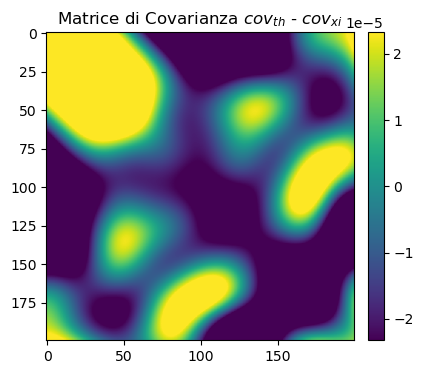

In [11]:
# Matrix plot della Matrice di Covarianza Teorica cov_th

fig = plt.figure(figsize=(6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza Teorica $cov_{th}$')
plt.imshow(cov_th, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()


# Matrix plot della Matrice di Covarianza cov_th - cov_xi

Delta_cov = cov_th - cov_xi

fig = plt.figure(figsize=(6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza $cov_{th}$ - $cov_{xi}$')
plt.imshow(Delta_cov, vmin = cmin, vmax = - cmin)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [12]:
# Calcolo dei Residui Normalizzati

R_th = np.zeros((Nbins, Nbins), dtype = float)

for i in range(Nbins):
    
    for j in range(Nbins):
        
        R_th[i, j] = cov_th[i, j] / (np.sqrt(cov_th[i, i] * cov_th[j, j]))
        
        
residuals = np.zeros((Nbins, Nbins), dtype = float)

for i in range(Nbins):
    
    for j in range(Nbins):
        
        residuals[i, j] = (cov_th[i, j] - cov_xi[i, j]) * np.sqrt((Nmeasures - 1.) / ((1. + (R_th[i, j]) ** 2. ) * cov_th[i, i] * cov_th[j, j]))

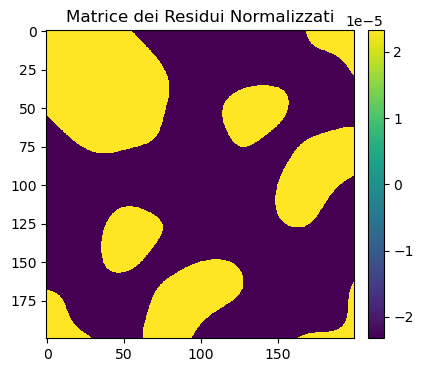

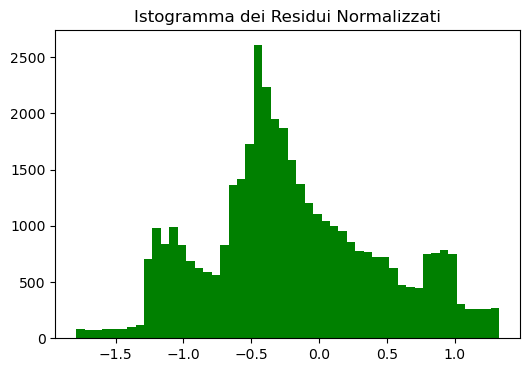

In [13]:
# Matrix plot della Matrice dei Residui Normalizzati

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice dei Residui Normalizzati')
plt.imshow(residuals, colormap, vmin = cmin, vmax = - cmin)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()


# Plot dell'Istogramma della Matrice dei Residui Normalizzati

res_arr = residuals.reshape(Nbins ** 2)

fig = plt.figure(figsize = (6, 4))
plt.title('Istogramma dei Residui Normalizzati')
plt.hist(res_arr, 50, color = 'green')
plt.show()

In [14]:
#  Verifica della Deviazione Standard e Risultati Finali

deviation = np.std(res_arr)

print('\n')

print('RISULTATI:')

print('\n')

print('La differenza massima tra Cov e cov_xi è =',np.max(np.abs(delta_cov)))

print('\n')

print('La Deviazione Standard dei Residui è = ',deviation)

print('\n')

if deviation < 1.1:
    
    print("Il codice funziona CORRETTAMENTE !")
else:
    print("QUALCOSA NON VA !")
    
end = time.time()

tempo = round(end - begin, 4)

print('\n')

print('Il tempo impiegato è =', tempo, 's')



RISULTATI:


La differenza massima tra Cov e cov_xi è = 4.336808689942018e-19


La Deviazione Standard dei Residui è =  0.6400407221689814


Il codice funziona CORRETTAMENTE !


Il tempo impiegato è = 6.4099 s
